In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jaclyn.bnv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Read in iris_raw.csv
df = pd.read_csv("../data/customer_prepped.csv")
# Build X, y (target -> y), drop species if present
y = df["churn"]
# X = df.drop(columns=["churn",'product_id','sale_id', 'customer_id', 'price', 'total_value','feedback_text'], errors="ignore")
X = df.drop(columns=["tokens","churn",'product_id','sale_id','feedback_text','sentiment', 'sale_date', 'last_purchase_date','customer_id'], errors="ignore")

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ROC AUC: 0.6339683586025049
Accuracy Score: 0.614375
              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1230
           1       0.30      0.51      0.38       370

    accuracy                           0.61      1600
   macro avg       0.56      0.58      0.55      1600
weighted avg       0.70      0.61      0.64      1600



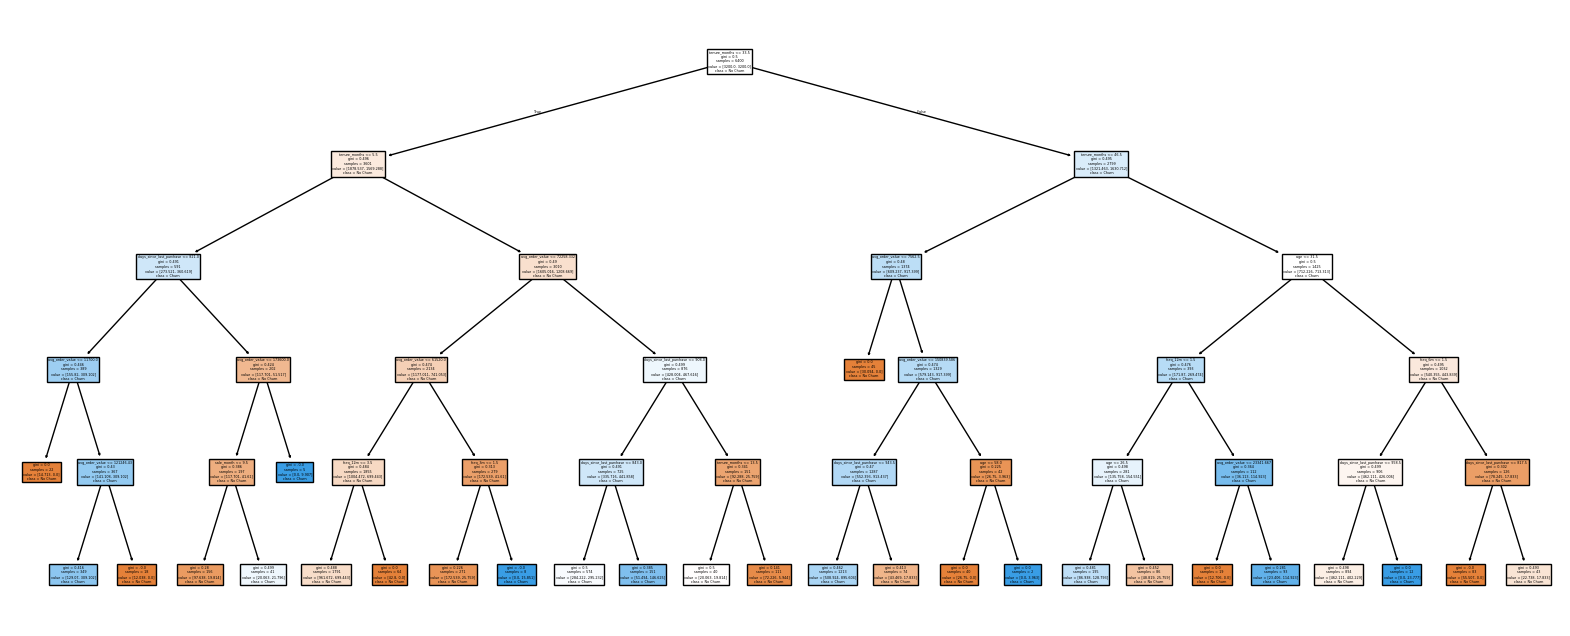

In [45]:
# Build tree (class_weight balances churn vs non-churn)
dt = DecisionTreeClassifier(
    max_depth=5,          # limit depth to avoid overfitting
    min_samples_split=20, # minimum samples to split
    class_weight="balanced",
    random_state=42
)

# Fit model
dt.fit(X_train, y_train)

# Evaluate
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize
plt.figure(figsize=(20,8))
plot_tree(dt, feature_names=X_train.columns, class_names=["No Churn","Churn"], filled=True)
plt.show()
